In [47]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt




## Data Cleaning
We downloaded both the financial fundamental and financial ratio data of North American companies from 2010-01-01 to 2020-12-31.

To perform data cleaning, we are going to merge the two data based on dates and company names. Then we will drop duplicated columns.

We also dropped missing rows and columns that has more than 30% of missing data. 

Last, we displayed the info of the cleaned data, and the summary statistics for the entire dataset, as well as the aggregated summary statistics for each company.

### Download and Merge data

In [31]:
ratios_df = pd.read_csv("data/company_ratios.csv")
fund_df = pd.read_csv("data/company_fundamentals.csv")

/var/folders/07/93fsqcys31jd88vb8lkpz_gc0000gn/T/ipykernel_871/2249429491.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  fund_df = pd.read_csv("data/company_fundamentals.csv")


In [32]:
ratios_df.head()

,gvkey,adate,qdate,public_date,opmad,gpm,roa,equity_invcap,debt_assets,cash_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,TICKER,cusip
0,1004,2009-05-31,2009-11-30,2010-01-31,0.082,0.201,0.095,0.651,0.498,0.466,3.586,186.451,2.272,1.001,AIR,00036110
1,1004,2009-05-31,2009-11-30,2010-02-28,0.082,0.201,0.095,0.651,0.498,0.466,3.586,186.451,2.272,1.001,AIR,00036110
2,1004,2009-05-31,2009-11-30,2010-03-31,0.082,0.201,0.095,0.651,0.498,0.466,3.586,186.451,2.272,1.001,AIR,00036110
3,1004,2009-05-31,2010-02-28,2010-04-30,0.081,0.195,0.086,0.676,0.473,0.545,3.893,183.882,2.312,0.987,AIR,00036110
4,1004,2009-05-31,2010-02-28,2010-05-31,0.081,0.195,0.086,0.676,0.473,0.545,3.893,183.882,2.312,0.987,AIR,00036110


In [33]:
fund_df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,oibdp,opincar,sale,uapt,xacc,xopr,xoprar,costat,county,naics
0,1004,2010-05-31,2009.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,134.345,NaN,1352.151,NaN,106.548,1217.806,NaN,A,NaN,423860.0
1,1004,2011-05-31,2010.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,196.312,NaN,1775.782,NaN,116.839,1579.470,NaN,A,NaN,423860.0
2,1004,2012-05-31,2011.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,222.693,NaN,2074.498,NaN,147.796,1851.805,NaN,A,NaN,423860.0
3,1004,2013-05-31,2012.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,245.200,NaN,2167.100,NaN,152.100,1921.900,NaN,A,NaN,423860.0
4,1004,2014-05-31,2013.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,256.000,NaN,2035.000,NaN,160.000,1779.000,NaN,A,NaN,423860.0


In [34]:
## Merge data
ratios_df['adate'] = pd.to_datetime(ratios_df['adate'])
fund_df['datadate'] = pd.to_datetime(fund_df['datadate'])

merged_df = pd.merge(
    ratios_df,
    fund_df,
    left_on=['gvkey', 'adate'],
    right_on=['gvkey', 'datadate'],
    how='inner'
)

In [35]:
merged_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'cusip_y', 'TICKER', 'gvkey'], inplace=True, errors='ignore')


### Drop missing columns and rows

In [36]:
## set multiindex data based on company and dates
merged_df.set_index(['conm', 'datadate'], inplace=True)

## drop columns with more than 50% of NA
threshold = 0.3 * len(merged_df)
cleaned_df = merged_df.dropna(axis=1, thresh=threshold)


In [37]:
cleaned_df = cleaned_df.dropna()

In [38]:
cleaned_df

adate       qdate public_date  opmad    gpm    roa  \
conm       datadate                                                             
AAR CORP   2010-05-31 2010-05-31  2010-05-31  2010-07-31  0.071  0.212  0.093   
           2010-05-31 2010-05-31  2010-05-31  2010-08-31  0.071  0.212  0.093   
           2010-05-31 2010-05-31  2010-05-31  2010-09-30  0.071  0.212  0.093   
           2010-05-31 2010-05-31  2010-08-31  2010-10-31  0.077  0.186  0.078   
           2010-05-31 2010-05-31  2010-08-31  2010-11-30  0.077  0.186  0.078   
...                          ...         ...         ...    ...    ...    ...   
ARCOSA INC 2019-12-31 2019-12-31  2020-06-30  2020-08-31  0.092  0.251  0.117   
           2019-12-31 2019-12-31  2020-06-30  2020-09-30  0.092  0.251  0.117   
           2019-12-31 2019-12-31  2020-06-30  2020-10-31  0.092  0.251  0.117   
           2019-12-31 2019-12-31  2020-09-30  2020-11-30  0.091  0.255  0.116   
           2019-12-31 2019-12-31  2020-09-30  2020-12-31  0.091  0.255  0.116   

                       equity_invcap  debt_assets  cash_ratio  curr_ratio  \
conm       datadate                                                         
AAR CORP   2010-05-31          0.690        0.503       0.244       2.652   
           2010-05-31          0.690        0.503       0.244       2.652   
           2010-05-31          0.690        0.503       0.244       2.652   
           2010-05-31          0.694        0.477       0.343       3.219   
           2010-05-31          0.694        0.477       0.343       3.219   
...                              ...          ...         ...         ...   
ARCOSA INC 2019-12-31          0.892        0.256       0.668       2.712   
           2019-12-31          0.892        0.256       0.668       2.712   
           2019-12-31          0.892        0.256       0.668       2.712   
           2019-12-31          0.879        0.275       0.670       2.563   
           2019-12-31          0.879        0.275       0.670       2.563   

                       ...  tic  curcd    capx    oiadp    oibdp      sale  \
conm       datadate    ...                                                   
AAR CORP   2010-05-31  ...  AIR    USD  28.855   95.415  134.345  1352.151   
           2010-05-31  ...  AIR    USD  28.855   95.415  134.345  1352.151   
           2010-05-31  ...  AIR    USD  28.855   95.415  134.345  1352.151   
           2010-05-31  ...  AIR    USD  28.855   95.415  134.345  1352.151   
           2010-05-31  ...  AIR    USD  28.855   95.415  134.345  1352.151   
...                    ...  ...    ...     ...      ...      ...       ...   
ARCOSA INC 2019-12-31  ...  ACA    USD  85.400  154.900  240.700  1736.900   
           2019-12-31  ...  ACA    USD  85.400  154.900  240.700  1736.900   
           2019-12-31  ...  ACA    USD  85.400  154.900  240.700  1736.900   
           2019-12-31  ...  ACA    USD  85.400  154.900  240.700  1736.900   
           2019-12-31  ...  ACA    USD  85.400  154.900  240.700  1736.900   

                          xacc      xopr costat     naics  
conm       datadate                                        
AAR CORP   2010-05-31  106.548  1217.806      A  423860.0  
           2010-05-31  106.548  1217.806      A  423860.0  
           2010-05-31  106.548  1217.806      A  423860.0  
           2010-05-31  106.548  1217.806      A  423860.0  
           2010-05-31  106.548  1217.806      A  423860.0  
...                        ...       ...    ...       ...  
ARCOSA INC 2019-12-31  113.900  1496.200      A  332312.0  
           2019-12-31  113.900  1496.200      A  332312.0  
           2019-12-31  113.900  1496.200      A  332312.0  
           2019-12-31  113.900  1496.200      A  332312.0  
           2019-12-31  113.900  1496.200      A  332312.0  

[200973 rows x 29 columns]

### Display data info and summary statistics

In [39]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 200973 entries, ('AAR CORP', Timestamp('2010-05-31 00:00:00')) to ('ARCOSA INC', Timestamp('2019-12-31 00:00:00'))
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   adate            200973 non-null  datetime64[ns]
 1   qdate            200973 non-null  object        
 2   public_date      200973 non-null  object        
 3   opmad            200973 non-null  float64       
 4   gpm              200973 non-null  float64       
 5   roa              200973 non-null  float64       
 6   equity_invcap    200973 non-null  float64       
 7   debt_assets      200973 non-null  float64       
 8   cash_ratio       200973 non-null  float64       
 9   curr_ratio       200973 non-null  float64       
 10  cash_conversion  200973 non-null  float64       
 11  inv_turn         200973 non-null  float64       
 12  at_turn          200973 non-null  float64

In [40]:
# Describe based on total dataset
cleaned_df.describe()

,adate,opmad,gpm,roa,equity_invcap,debt_assets,cash_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,fyear,capx,oiadp,oibdp,sale,xacc,xopr,naics
count,200973,200973.000000,200973.000000,200973.000000,200973.000000,200973.000000,200973.000000,200973.00000,200973.000000,200973.000000,200973.000000,200973.000000,200973.000000,200973.000000,200973.000000,200973.000000,200973.000000,200973.000000,200973.000000
mean,2015-02-24 01:20:10.246152448,-1.276132,-0.968809,0.066343,0.631419,0.520304,1.248900,2.88419,115.080601,43.397596,1.080422,2014.185930,262.390661,515.906772,728.938454,4679.809383,291.352526,3950.870929,348044.947859
min,2010-01-31 00:00:00,-10597.000000,-9833.300000,-3.928000,-175.670000,0.015000,0.000000,0.04900,0.005000,0.000000,0.000000,2009.000000,0.000000,-25913.000000,-21913.000000,-1.977000,0.000000,1.164000,42.000000
25%,2012-09-30 00:00:00,0.006000,0.230000,0.049000,0.499000,0.330000,0.204000,1.49400,41.633000,2.985000,0.582000,2012.000000,4.091000,1.154000,7.523000,151.314000,9.390000,146.749000,325412.000000
50%,2014-12-31 00:00:00,0.069000,0.351000,0.109000,0.718000,0.511000,0.540000,2.18500,78.958000,5.035000,0.909000,2014.000000,25.425000,51.056000,85.500000,760.941000,42.228000,650.270000,334413.000000
75%,2017-12-31 00:00:00,0.137000,0.499000,0.163000,0.964000,0.674000,1.403000,3.36100,130.054000,10.449000,1.394000,2017.000000,118.200000,284.784000,415.300000,2794.925000,166.957000,2313.244000,423690.000000
max,2020-10-31 00:00:00,0.757000,1.085000,2.379000,21.135000,6.065000,68.216000,71.39600,139905.000000,120266.000000,22.698000,2020.000000,37985.000000,42959.000000,54559.000000,521426.000000,23683.000000,491287.000000,999990.000000
std,NaN,63.514509,70.409691,0.233936,1.316484,0.271056,2.099953,2.51818,824.469717,1196.980491,0.800626,2.926203,1174.371580,1946.030302,2639.398166,18404.833650,1121.484953,16550.518832,143959.695662


In [41]:
# Describe the data based on each company over the years
cleaned_df.groupby('conm').describe().transpose()


conm                     1-800-FLOWERS.COM               10X GENOMICS INC  \
adate count                            101                             14   
      mean   2016-03-20 09:16:02.376237568  2019-10-13 18:51:25.714285824   
      min              2012-06-30 00:00:00            2018-12-31 00:00:00   
      25%              2014-06-30 00:00:00            2019-12-31 00:00:00   
      50%              2016-06-30 00:00:00            2019-12-31 00:00:00   
...                                    ...                            ...   
naics 25%                         455110.0                       325413.0   
      50%                         455110.0                       325413.0   
      75%                         455110.0                       325413.0   
      max                         455110.0                       325413.0   
      std                              0.0                            0.0   

conm        1LIFE HEALTHCARE INC 22ND CENTURY GROUP INC  \
adate count                    8                     80   
      mean   2019-12-31 00:00:00    2017-01-26 23:06:00   
      min    2019-12-31 00:00:00    2013-12-31 00:00:00   
      25%    2019-12-31 00:00:00    2014-12-31 00:00:00   
      50%    2019-12-31 00:00:00    2016-12-31 00:00:00   
...                          ...                    ...   
naics 25%               621112.0               312230.0   
      50%               621112.0               312230.0   
      75%               621112.0               312230.0   
      max               621112.0               312230.0   
      std                    0.0                    0.0   

conm                       3D SYSTEMS CORP                          3M CO  \
adate count                            119                            119   
      mean   2015-06-17 21:22:41.344537856  2015-06-17 21:22:41.344537856   
      min              2010-12-31 00:00:00            2010-12-31 00:00:00   
      25%              2012-12-31 00:00:00            2012-12-31 00:00:00   
      50%              2014-12-31 00:00:00            2014-12-31 00:00:00   
...                                    ...                            ...   
naics 25%                         333248.0                       999977.0   
      50%                         333248.0                       999977.0   
      75%                         333248.0                       999977.0   
      max                         333248.0                       999977.0   
      std                              0.0                            0.0   

conm                    3PAR INC 6D GLOBAL TECHNOLOGIES 99 CENTS ONLY STORES  \
adate count                    4                     12                   20   
      mean   2010-03-31 00:00:00    2013-12-30 18:00:00  2010-08-24 00:00:00   
      min    2010-03-31 00:00:00    2010-12-31 00:00:00  2010-03-31 00:00:00   
      25%    2010-03-31 00:00:00    2013-12-30 18:00:00  2010-03-31 00:00:00   
      50%    2010-03-31 00:00:00    2014-12-31 00:00:00  2010-03-31 00:00:00   
...                          ...                    ...                  ...   
naics 25%               334112.0               541512.0             452990.0   
      50%               334112.0               541512.0             452990.0   
      75%               334112.0               541512.0             452990.0   
      max               334112.0               541512.0             452990.0   
      std                    0.0                    0.0                  0.0   

conm        A-MARK PRECIOUS METALS INC  ...                     ZOETIS INC  \
adate count                         80  ...                             92   
      mean         2017-01-30 03:54:00  ...  2016-07-28 18:46:57.391304448   
      min          2013-06-30 00:00:00  ...            2012-12-31 00:00:00   
      25%          2015-06-30 00:00:00  ...            2014-12-31 00:00:00   
      50%          2017-06-30 00:00:00  ...            2016-12-31 00:00:00   
...         

### Graph the Distribution of return on asset

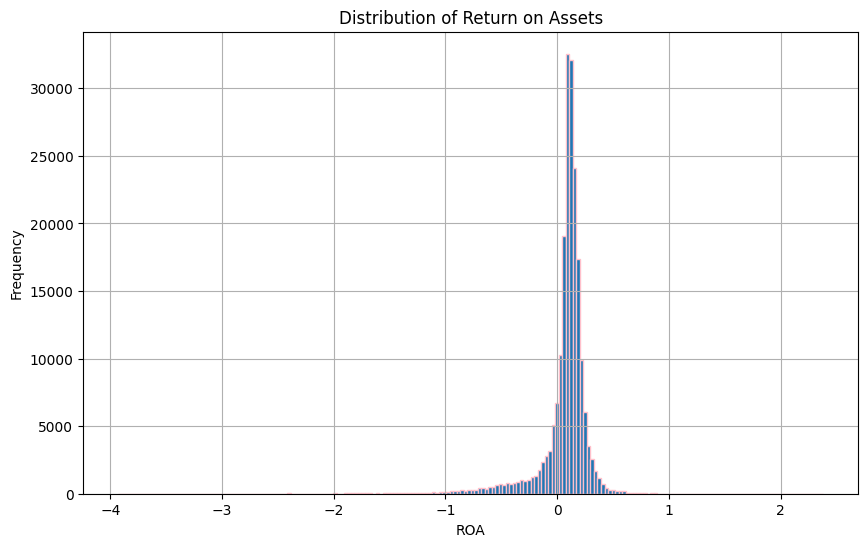

In [53]:
plt.figure(figsize=(10, 6))
cleaned_df['roa'].hist(bins=200, edgecolor='pink')
plt.title('Distribution of Return on Assets')
plt.xlabel('ROA')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Correlation between predictor variables and outcome variable

In [54]:
correlation_matrix = cleaned_df.corr()

# Step 2: Extract the correlations between 'roa' and the other predictors
roa_correlation = correlation_matrix['roa'].drop('roa').sort_values(ascending=False)

# Display the correlation values in a table



In [55]:
roa_correlation

at_turn                        0.248804
oiadp                          0.134334
oibdp                          0.123622
opmad                          0.098184
xacc                           0.092189
                                 ...   
conm_WISA TECHNOLOGIES INC    -0.111770
conm_NEXTTRIP INC             -0.111804
conm_VIVANI MEDICAL INC       -0.113453
conm_TENAX THERAPEUTICS INC   -0.117665
cash_ratio                    -0.210547
Name: roa, Length: 2972, dtype: float64

In [ ]:
# Step 3: Plot a bar chart for better visualization of correlations
plt.figure(figsize=(12, 6))
roa_correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation of Predictors with Return on Assets (ROA)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Predictors')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y')
plt.show()

## OLS regrassion data processing

In [42]:
cleaned_df = cleaned_df.reset_index()

In [43]:
cleaned_df

,conm,datadate,adate,qdate,public_date,opmad,gpm,roa,equity_invcap,debt_assets,...,tic,curcd,capx,oiadp,oibdp,sale,xacc,xopr,costat,naics
0,AAR CORP,2010-05-31,2010-05-31,2010-05-31,2010-07-31,0.071,0.212,0.093,0.690,0.503,...,AIR,USD,28.855,95.415,134.345,1352.151,106.548,1217.806,A,423860.0
1,AAR CORP,2010-05-31,2010-05-31,2010-05-31,2010-08-31,0.071,0.212,0.093,0.690,0.503,...,AIR,USD,28.855,95.415,134.345,1352.151,106.548,1217.806,A,423860.0
2,AAR CORP,2010-05-31,2010-05-31,2010-05-31,2010-09-30,0.071,0.212,0.093,0.690,0.503,...,AIR,USD,28.855,95.415,134.345,1352.151,106.548,1217.806,A,423860.0
3,AAR CORP,2010-05-31,2010-05-31,2010-08-31,2010-10-31,0.077,0.186,0.078,0.694,0.477,...,AIR,USD,28.855,95.415,134.345,1352.151,106.548,1217.806,A,423860.0
4,AAR CORP,2010-05-31,2010-05-31,2010-08-31,2010-11-30,0.077,0.186,0.078,0.694,0.477,...,AIR,USD,28.855,95.415,134.345,1352.151,106.548,1217.806,A,423860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200968,ARCOSA INC,2019-12-31,2019-12-31,2020-06-30,2020-08-31,0.092,0.251,0.117,0.892,0.256,...,ACA,USD,85.400,154.900,240.700,1736.900,113.900,1496.200,A,332312.0
200969,ARCOSA INC,2019-12-31,2019-12-31,2020-06-30,2020-09-30,0.092,0.251,0.117,0.892,0.256,...,ACA,USD,85.400,154.900,240.700,1736.900,113.900,1496.200,A,332312.0
200970,ARCOSA INC,2019-12-31,2019-12-31,2020-06-30,2020-10-31,0.092,0.251,0.117,0.892,0.256,...,ACA,USD,85.400,154.900,240.700,1736.900,113.900,1496.200,A,332312.0
200971,ARCOSA INC,2019-12-31,2019-12-31,2020-09-30,2020-11-30,0.091,0.255,0.116,0.879,0.275,...,ACA,USD,85.400,154.900,240.700,1736.900,113.900,1496.200,A,332312.0


In [44]:
## Change the dates to month and year - drop full date column
cleaned_df['month'] = cleaned_df['adate'].dt.month
cleaned_df['day'] = cleaned_df['adate'].dt.day
cleaned_df = cleaned_df.drop(columns=['adate', 'datadate'])

In [45]:
# One-hot encode the "conm" column and remove other string columns

cleaned_df = pd.get_dummies(cleaned_df, columns=["conm"], dtype='int')
cleaned_df = cleaned_df.drop(cleaned_df.select_dtypes(['object']), axis=1)
cleaned_df

,opmad,gpm,roa,equity_invcap,debt_assets,cash_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,...,conm_ZOETIS INC,conm_ZOGENIX INC,conm_ZOLL MEDICAL CORP,conm_ZOOM TECHNOLOGIES INC,conm_ZORAN CORP,conm_ZUMIEZ INC,conm_ZURN ELKAY WATER SOLUTI CORP,conm_ZW DATA ACTION TECHNOLGY INC,conm_ZYGO CORP,conm_ZYLA LIFE SCIENCES
0,0.071,0.212,0.093,0.690,0.503,0.244,2.652,192.779,2.188,0.939,...,0,0,0,0,0,0,0,0,0,0
1,0.071,0.212,0.093,0.690,0.503,0.244,2.652,192.779,2.188,0.939,...,0,0,0,0,0,0,0,0,0,0
2,0.071,0.212,0.093,0.690,0.503,0.244,2.652,192.779,2.188,0.939,...,0,0,0,0,0,0,0,0,0,0
3,0.077,0.186,0.078,0.694,0.477,0.343,3.219,180.501,2.344,0.972,...,0,0,0,0,0,0,0,0,0,0
4,0.077,0.186,0.078,0.694,0.477,0.343,3.219,180.501,2.344,0.972,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200968,0.092,0.251,0.117,0.892,0.256,0.668,2.712,94.890,4.667,0.774,...,0,0,0,0,0,0,0,0,0,0
200969,0.092,0.251,0.117,0.892,0.256,0.668,2.712,94.890,4.667,0.774,...,0,0,0,0,0,0,0,0,0,0
200970,0.092,0.251,0.117,0.892,0.256,0.668,2.712,94.890,4.667,0.774,...,0,0,0,0,0,0,0,0,0,0
200971,0.091,0.255,0.116,0.879,0.275,0.670,2.563,89.413,4.814,0.760,...,0,0,0,0,0,0,0,0,0,0


In [46]:

X = cleaned_df.drop(columns=["roa", "month", "day"])
y = cleaned_df["roa"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     379.7
Date:                Sat, 16 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:38:30   Log-Likelihood:             1.9776e+05
No. Observations:              200973   AIC:                        -3.896e+05
Df Residuals:                  198005   BIC:                        -3.593e+05
Df Model:                        2967                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 